The goal is to create a regression model to forcast stock price based on the 10 year treasury bond rate yield.
The data is from https://www.macrotrends.net

In [69]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

ten_year_treasury = pd.read_csv("./data/10-year-treasury-bond-rate-yield-chart.csv", delimiter=",", index_col=["date"])
print(ten_year_treasury.head())
one_year_treasury = pd.read_csv("./data/1-year-treasury-rate-yield-chart.csv", delimiter=",", index_col=["date"])
print(one_year_treasury.head())
five_year_treasury = pd.read_csv("./data/5-year-treasury-bond-rate-yield-chart.csv", delimiter=",", index_col=["date"])
print(five_year_treasury.head())
ten_year_treasury_prices = pd.read_csv("./data/10-year-treasury-bond-prices.csv", delimiter=",", index_col=["Date"])
ten_year_treasury_prices.drop(columns=["Open", "High", "Low", "Change %"], inplace= True)
print(ten_year_treasury_prices.head())
price_to_earnings = pd.read_csv("./data/sp-500-pe-ratio-price-to-earnings-chart.csv", delimiter=",", index_col=["date"])
print(price_to_earnings.head())
fed_fund_rate = pd.read_csv("./data/fed-funds-rate-historical-chart.csv", delimiter=",", index_col=["date"])
print(fed_fund_rate.head())
sp_500_value = pd.read_csv("./data/sp-500-chart.csv", delimiter=",", index_col=["date"])
print(sp_500_value.head())
gold_value = pd.read_csv("./data/gold-price.csv", delimiter=",", index_col=["date"])
print(gold_value.head())
economic_growth = pd.read_csv("./data/us-economic-growth.csv", delimiter=",", index_col=["date"])
print(gold_value.head())
economic_growth = pd.read_csv("./data/us-economic-growth.csv", delimiter=",", index_col=["date"])
print(gold_value.head())


             value
date              
1962-01-02    4.06
1962-01-03    4.03
1962-01-04    3.99
1962-01-05    4.02
1962-01-08    4.03
             value
date              
1962-01-02    3.22
1962-01-03    3.24
1962-01-04    3.24
1962-01-05    3.26
1962-01-08    3.31
             value
date              
1962-01-02    3.88
1962-01-03    3.87
1962-01-04    3.86
1962-01-05    3.89
1962-01-08    3.91
              Price
Date               
Aug 13, 1999  5.979
Aug 12, 1999  6.080
Aug 11, 1999  6.100
Aug 10, 1999  6.162
Aug 09, 1999  6.131
              value
date               
1927-12-01  15.9099
1928-01-01  14.8898
1928-02-01  14.6271
1928-03-01  16.3390
1928-04-01  15.8000
             value
date              
1954-07-01    1.13
1954-07-02    1.25
1954-07-03    1.25
1954-07-04    1.25
1954-07-05    0.88
              real  nominal
date                       
1927-12-01  298.38    17.66
1928-01-01  296.86    17.57
1928-02-01  295.03    17.26
1928-03-01  329.55    19.28
1928-04-01  337.59  

Lets take a look at our data.
Therefore we need to convert string dates into datetime objects otherwise the labels on our x-axis would overlap.

In [70]:
historical_inflation = pd.read_csv("./data/historical-infaltion-rate-monthly.csv", delimiter=",")

def transform_inflation_data(historical_inflation):
    _historical_inflation = []
    temp_row = []

    for row in historical_inflation.values:
        for i in range(len(row)-1):

            year = str(int(row[0]))
            
            if i+1 < 10:
                month = "0"+ str(i+1)
            else:
                month = str(i+1)
            
            first_of_month = "01"

            date_string = year +"-"+ month +"-"+ first_of_month
            data = [date_string,row[i+1]]

            _historical_inflation.append(data)
    
    _historical_inflation = pd.DataFrame(_historical_inflation, columns=["date"," value"]) 
    _historical_inflation.set_index("date", inplace=True)
    return _historical_inflation
  

historical_inflation = transform_inflation_data(historical_inflation)

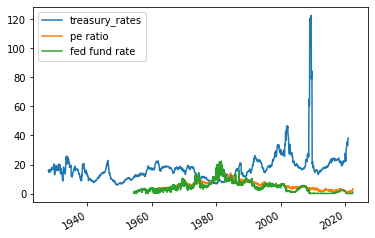

In [71]:
ten_year_treasury.index = mdates.num2date(mdates.datestr2num(ten_year_treasury.index))
one_year_treasury.index = mdates.num2date(mdates.datestr2num(one_year_treasury.index))
five_year_treasury.index = mdates.num2date(mdates.datestr2num(five_year_treasury.index))
ten_year_treasury_prices.index = mdates.num2date(mdates.datestr2num(ten_year_treasury_prices.index))
price_to_earnings.index = mdates.num2date(mdates.datestr2num(price_to_earnings.index))
fed_fund_rate.index = mdates.num2date(mdates.datestr2num(fed_fund_rate.index))
sp_500_value.index = mdates.num2date(mdates.datestr2num(sp_500_value.index))
gold_value.index = mdates.num2date(mdates.datestr2num(gold_value.index))
economic_growth.index = mdates.num2date(mdates.datestr2num(economic_growth.index))
historical_inflation.index = mdates.num2date(mdates.datestr2num(historical_inflation.index))

fig, ax = plt.subplots()
ax.plot(price_to_earnings.index, price_to_earnings[" value"])
ax.plot(ten_year_treasury.index, ten_year_treasury[" value"])
ax.plot(fed_fund_rate.index, fed_fund_rate[" value"])
# cannot plot sp_500_value - to large values
plt.legend(["treasury_rates","pe ratio","fed fund rate"])
fig.autofmt_xdate()
plt.show()

Lets merge the data so we can get a treasury_rate value for every price_to_earnings value.

In [72]:

ten_year_treasury.rename(columns={' value': 'ten_treasury_rate'}, inplace=True)
price_to_earnings.rename(columns={' value': 'price_to_earnings'}, inplace=True)
one_year_treasury.rename(columns={' value': 'one_treasury_rate'}, inplace=True)
five_year_treasury.rename(columns={' value': 'five_treasury_rate'}, inplace=True)
fed_fund_rate.rename(columns={' value': 'fed_fund_rate'}, inplace=True)
sp_500_value.rename(columns={'real': 'sp_500_real'}, inplace=True)
sp_500_value.rename(columns={'nominal': 'sp_500_nominal'}, inplace=True)
gold_value.rename(columns={'real': 'gold_real'}, inplace=True)
gold_value.rename(columns={'nominal': 'gold_nominal'}, inplace=True)
economic_growth.rename(columns={'gdp': 'gdp'}, inplace=True)
economic_growth.rename(columns={'per capita': 'per_capita'}, inplace=True)
economic_growth.rename(columns={'growth rate': 'growth_rate'}, inplace=True) 
historical_inflation.rename(columns={' value': 'historical_inflation'}, inplace=True) 
ten_year_treasury_prices.rename(columns={'Price': 'ten_year_treasury_prices'}, inplace=True) 

data = pd.merge(ten_year_treasury,price_to_earnings, left_index=True, right_index=True)
data = pd.merge(data, one_year_treasury, left_index=True, right_index=True)
data = pd.merge(data, five_year_treasury, left_index=True, right_index=True)
data = pd.merge(data, fed_fund_rate, left_index=True, right_index=True)
data = pd.merge(data, sp_500_value, left_index=True, right_index=True)
data = pd.merge(data, gold_value, left_index=True, right_index=True)
data = pd.merge(data, economic_growth, left_index=True, right_index=True)
data = pd.merge(data, historical_inflation, left_index=True, right_index=True)

#data = data[["ten_treasury_rate", "price_to_earnings", "one_treasury_rate", "five_year_treasury", "ten_year_treasury_prices", "fed_fund_rate", "sp_500_real", "sp_500_nominal", "gold_real", "gold_nominal", "gdp", "per_capita", "growth_rate", "historical_inflation"]]

print(data.head())

                           ten_treasury_rate  price_to_earnings  \
1962-03-01 00:00:00+00:00               3.98            20.6380   
1962-06-01 00:00:00+00:00               3.89            15.7781   
1963-03-01 00:00:00+00:00               3.93            17.9434   
1964-06-01 00:00:00+00:00               4.19            18.8661   
1964-09-01 00:00:00+00:00               4.21            18.8322   

                           one_treasury_rate  five_treasury_rate  \
1962-03-01 00:00:00+00:00               3.15                3.71   
1962-06-01 00:00:00+00:00               2.98                3.64   
1963-03-01 00:00:00+00:00               3.00                3.67   
1964-06-01 00:00:00+00:00               3.84                4.03   
1964-09-01 00:00:00+00:00               3.83                4.08   

                           fed_fund_rate  sp_500_real  sp_500_nominal  \
1962-03-01 00:00:00+00:00           2.50       675.40           69.55   
1962-06-01 00:00:00+00:00           2.75  

## looking for correlations


In [73]:
for i in range(3):
    data[f'shifted_historical_inflation{i+1}'] = data.historical_inflation.shift(i+1)
    data[f'shifted_one_treasury_rate{i+1}'] = data.one_treasury_rate.shift(i+1)
    data[f'shifted_five_treasury_rate{i+1}'] = data.five_treasury_rate.shift(i+1)
    data[f'shifted_ten_treasury_rate{i+1}'] = data.ten_treasury_rate.shift(i+1)
data.corr()["price_to_earnings"]

ten_treasury_rate               -0.386735
price_to_earnings                1.000000
one_treasury_rate               -0.430660
five_treasury_rate              -0.398485
fed_fund_rate                   -0.409747
sp_500_real                      0.372050
sp_500_nominal                   0.335682
gold_real                       -0.002008
gold_nominal                     0.192110
growth_rate                     -0.167019
historical_inflation            -0.151887
shifted_historical_inflation1   -0.312895
shifted_one_treasury_rate1      -0.382179
shifted_five_treasury_rate1     -0.378748
shifted_ten_treasury_rate1      -0.376181
shifted_historical_inflation2   -0.261408
shifted_one_treasury_rate2      -0.286542
shifted_five_treasury_rate2     -0.317483
shifted_ten_treasury_rate2      -0.333723
shifted_historical_inflation3   -0.096535
shifted_one_treasury_rate3      -0.215275
shifted_five_treasury_rate3     -0.265236
shifted_ten_treasury_rate3      -0.292537
Name: price_to_earnings, dtype: fl

one year treasury rate seems to be the best predictor for pe ratio

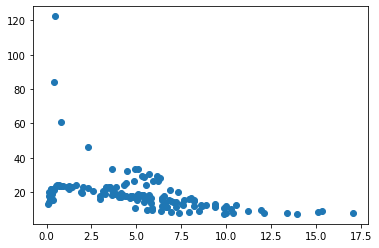

In [74]:

sp_treasury_rate = data.one_treasury_rate
plt.scatter(sp_treasury_rate, data.price_to_earnings)
plt.show()

## Linear regression. 
Using half of data for training

r² 0.5398470458303972


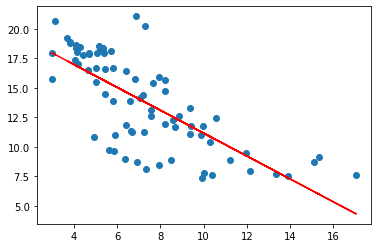

In [75]:
from scipy import stats


def predict(slope, x, intercept):
    return slope * x + intercept

def use_line_reg_and_show_result(feature_1,feature_2, test = True):

    if test:
        ## using half of the data for training
        half_idx = len(feature_1) // 2
        feature_1 = feature_1[:half_idx]
        feature_2 = feature_2[:half_idx]

    slope, intercept, r_value, p_value, std_err = stats.linregress(feature_1, feature_2)
    fitline = predict(slope, feature_1, intercept)
    plt.scatter(feature_1, feature_2)
    plt.plot(feature_1, fitline, c="r")

    print("r²",r_value ** 2)
    return slope, intercept, r_value

slope, intercept, r_value = use_line_reg_and_show_result(sp_treasury_rate, data.price_to_earnings)


The r² value shows that its not that predictiv.
On the scatter plot we can see a few outliers, if we can filter those out, we probably get a better match.
Let's filter everything above or below one standard diviation.

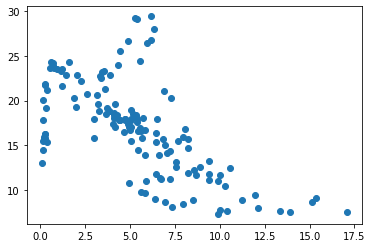

In [76]:
import numpy as np

median = np.median(data.price_to_earnings)
std = np.std(data.price_to_earnings)

filtered_data = data[(median - 1 * std < data.price_to_earnings) & (median + 1 * std > data.price_to_earnings)]
sp_treasury_rate = filtered_data.one_treasury_rate
plt.scatter(sp_treasury_rate, filtered_data.price_to_earnings)


after filtering outliers we get a better result

r² 0.3944981396460422


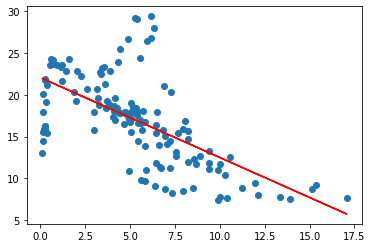

In [77]:
treasury_rate_slope, treasury_rate_intercept, r_value = use_line_reg_and_show_result(sp_treasury_rate, filtered_data.price_to_earnings, test = False)

In [78]:
# https://www.cnbc.com/quotes/US10Y
CURRENT_TREASURY_RATE = 5.477
# https://www.multpl.com/s-p-500-pe-ratio
CURRENT_PE_RATIO_SP = 25.31

fair_price_to_earnings_value = predict(treasury_rate_slope,CURRENT_TREASURY_RATE,treasury_rate_intercept)
print("fair p/e value for the current treasury rate yield,",CURRENT_TREASURY_RATE,",is",fair_price_to_earnings_value)
print("p/e of the s&p 500,", CURRENT_PE_RATIO_SP)

prediction = None
def is_xyz_undervalued_or_overvalued(current, fair, topic):

    #if current < fair:
        #prediction =  1- current / fair
        #print("the "+topic+" is undervalued! Should be", prediction,"higher.")
   # else:
        #prediction = fair / current - 1
        #print("the "+topic+" is overvalued! Should be", prediction ,"lower.")
    
    prediction = (current / fair - 1) * 100
    if prediction > 0: 
        print("the "+topic+" is overvalued! It is", prediction ,"to high.")
    else:
        print("the "+topic+" is undervalued! It is", prediction,"to low.")
    
    return prediction

treasury_prediction = is_xyz_undervalued_or_overvalued(CURRENT_PE_RATIO_SP, fair_price_to_earnings_value, "s&p")


fair p/e value for the current treasury rate yield, 5.477 ,is 16.81434485466587
p/e of the s&p 500, 25.31
the s&p is overvalued! It is 50.526233515287046 to high.


predict treasury rate with fed fund rate

r² 0.9688066474428152


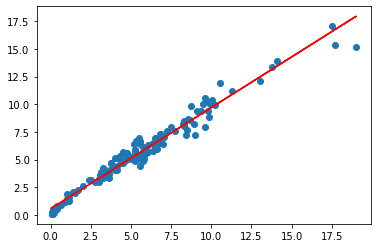

In [79]:
fed_fund_slope, fed_fund_intercept, r_value = use_line_reg_and_show_result(filtered_data.fed_fund_rate, sp_treasury_rate, test = False)

In [80]:
# https://www.bankrate.com/rates/interest-rates/federal-funds-rate/
CURRENT_FED_FUND_RATE = 5.5
fair_treasury_rate_value = predict(fed_fund_slope, CURRENT_FED_FUND_RATE, fed_fund_intercept)
fair_price_to_earnings_value = predict(treasury_rate_slope, fair_treasury_rate_value, treasury_rate_intercept)

print("fair treasury rate yield for the current fed fund rate,",CURRENT_FED_FUND_RATE,",is",fair_treasury_rate_value)
print("fair price to earnings value based on current fed fund rate,",CURRENT_FED_FUND_RATE,",is",fair_price_to_earnings_value)

fed_prediction = is_xyz_undervalued_or_overvalued(CURRENT_PE_RATIO_SP, fair_price_to_earnings_value, "s&p")

fair treasury rate yield for the current fed fund rate, 5.5 ,is 5.582034864337115
fair price to earnings value based on current fed fund rate, 5.5 ,is 16.71376420326218
the s&p is overvalued! It is 51.432075337403724 to high.


### poly regress

In [81]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import minmax_scale

def regression(x, y, deg, x_label, y_label, test= True): 

    if test:
        ## using half of the data for training
        half_idx = len(x) // 2
        x = x[:half_idx]
        y = y[:half_idx]

    predict = np.poly1d(np.polyfit(x,y,deg))
    myLine = np.linspace(x.min(),x.max(),y.size)

    plt.scatter(x, y)
    plt.plot(myLine, predict(myLine), c="r")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

    print("r²", r2_score(y, predict(x)))

    return predict

### predict pe based on treasury rate with poly regress

one year treasury rate

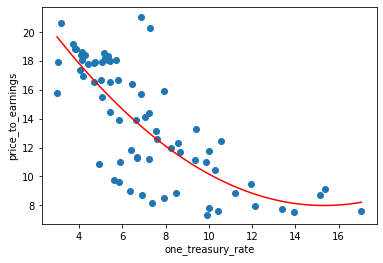

r² 0.601711930581309


In [82]:
predictPEbasedOneTreasuryRate = regression(filtered_data.one_treasury_rate, filtered_data.price_to_earnings, 2, "one_treasury_rate", "price_to_earnings", test = True)

In [83]:
fairPE = predictPEbasedOneTreasuryRate(CURRENT_TREASURY_RATE)
is_xyz_undervalued_or_overvalued(CURRENT_PE_RATIO_SP, fairPE, "sp500")

the sp500 is overvalued! It is 63.917870479080264 to high.


63.917870479080264

ten year treasury rate

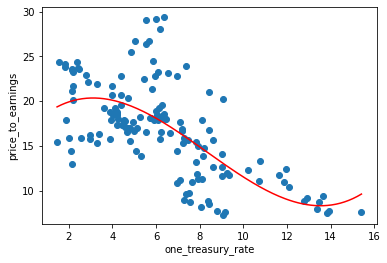

r² 0.4424434941748202


In [84]:
predictPEbasedTenTreasuryRate = regression(filtered_data.ten_treasury_rate, filtered_data.price_to_earnings, 3, "one_treasury_rate", "price_to_earnings", test = False)

### predict pe based on fed fund rate with poly regress

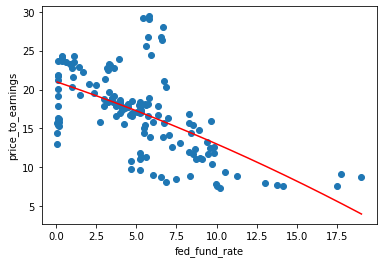

r² 0.35558389450833583


In [85]:
predictPEbasedOnFedFundRate = regression(filtered_data.fed_fund_rate, filtered_data.price_to_earnings, 2, "fed_fund_rate", "price_to_earnings", test = False )

In [86]:
fair_pe = predictPEbasedOnFedFundRate(CURRENT_FED_FUND_RATE)
is_xyz_undervalued_or_overvalued(CURRENT_PE_RATIO_SP, fair_pe, "sp500")

the sp500 is overvalued! It is 49.99123906072065 to high.


49.99123906072065

normalize data to see if it inceases prediction performance

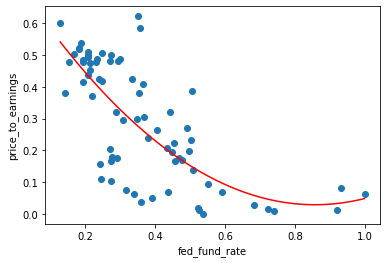

r² 0.5426528990256183


In [87]:

normalized_fed_fund_rate = minmax_scale(filtered_data.fed_fund_rate.values.reshape(-1,1)).reshape(-1,)
normalized_price_to_earnings = minmax_scale(filtered_data.price_to_earnings.values.reshape(-1,1)).reshape(-1,)

predictPEbasedOnFedFundRate_normalized = regression(normalized_fed_fund_rate, normalized_price_to_earnings, 2, "fed_fund_rate", "price_to_earnings" )

In [88]:
fair_pe = predictPEbasedOnFedFundRate_normalized(CURRENT_FED_FUND_RATE)
is_xyz_undervalued_or_overvalued(CURRENT_PE_RATIO_SP, fair_pe, "sp500")

the sp500 is overvalued! It is 21.91037234987865 to high.


21.91037234987865

normalization doesnt look to be an improvment

### predict gold price based on fed fund rate

create gold/sp500 ratio

In [89]:
def add_sp500_gold_ratio(row):
    return round(row['sp_500_nominal'] / row['gold_nominal'],2)

filtered_data['sp500_gold_ratio'] = filtered_data.apply(add_sp500_gold_ratio, axis=1)
data['sp500_gold_ratio'] = filtered_data.apply(add_sp500_gold_ratio, axis=1)

C:\Users\weiss\AppData\Local\Temp\ipykernel_35492\984081570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sp500_gold_ratio'] = filtered_data.apply(add_sp500_gold_ratio, axis=1)


In [90]:
print(filtered_data.sp500_gold_ratio.head())

1962-03-01 00:00:00+00:00    1.97
1962-06-01 00:00:00+00:00    1.55
1963-03-01 00:00:00+00:00    1.89
1964-06-01 00:00:00+00:00    2.31
1964-09-01 00:00:00+00:00    2.38
Name: sp500_gold_ratio, dtype: float64


get column with highest correlation

In [91]:
filtered_data.corr()["sp500_gold_ratio"]

ten_treasury_rate               -0.470487
price_to_earnings                0.744692
one_treasury_rate               -0.349139
five_treasury_rate              -0.413631
fed_fund_rate                   -0.326359
sp_500_real                      0.526786
sp_500_nominal                   0.339339
gold_real                       -0.508538
gold_nominal                    -0.179713
growth_rate                      0.011821
historical_inflation            -0.128744
shifted_historical_inflation1   -0.165457
shifted_one_treasury_rate1      -0.343083
shifted_five_treasury_rate1     -0.401593
shifted_ten_treasury_rate1      -0.457540
shifted_historical_inflation2   -0.144534
shifted_one_treasury_rate2      -0.345057
shifted_five_treasury_rate2     -0.400161
shifted_ten_treasury_rate2      -0.454741
shifted_historical_inflation3   -0.171590
shifted_one_treasury_rate3      -0.345936
shifted_five_treasury_rate3     -0.399985
shifted_ten_treasury_rate3      -0.452117
sp500_gold_ratio                 1

going for ten_treasury_rate, pe ratio doesnt make sense clearly both ratios are connected with price of sp500

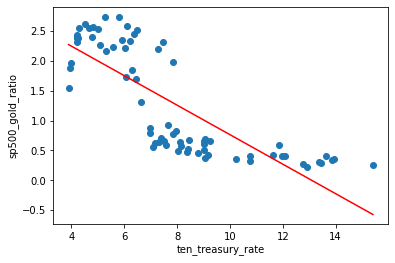

r² 0.6397065592915916


In [92]:
predict_sp500_gold_ratio = regression(filtered_data.ten_treasury_rate, filtered_data.sp500_gold_ratio, 1, "ten_treasury_rate", "sp500_gold_ratio")

In [93]:
corr_sp500_gold_ratio = filtered_data.corr()["sp500_gold_ratio"]

check if outliers are correlating with anything?

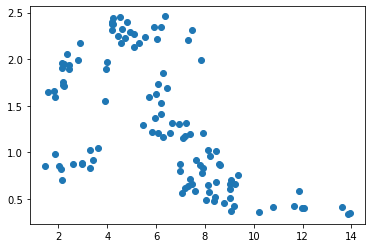

In [94]:
median = np.median(filtered_data.sp500_gold_ratio)
std = np.std(filtered_data.sp500_gold_ratio)

filtered_data_for_gold_prediction = filtered_data[(median - 1 * std < filtered_data.sp500_gold_ratio) & (median + 1 * std > filtered_data.sp500_gold_ratio)]
plt.scatter(filtered_data_for_gold_prediction.ten_treasury_rate, filtered_data_for_gold_prediction.sp500_gold_ratio)

corr_filtered_sp500_gold_ratio = filtered_data_for_gold_prediction.corr()["sp500_gold_ratio"]

In [95]:
# Calculate squard differnece between whole dataset vs outliers
subt_corr_matrix_squared = (corr_sp500_gold_ratio -  corr_filtered_sp500_gold_ratio) * (corr_sp500_gold_ratio -  corr_filtered_sp500_gold_ratio)  
# Calculate the absolute correlation values
abs_corr_values = subt_corr_matrix_squared.abs()
# Find the variable with the highest absolute correlation
max_corr = abs_corr_values.idxmax()

print("Variable in the outliers dataset, with higher correlation than the whole dataset:", max_corr)
print("whole", corr_sp500_gold_ratio[max_corr],"outlier", corr_filtered_sp500_gold_ratio[max_corr])

Variable in the outliers dataset, with higher correlation than the whole dataset: shifted_ten_treasury_rate2
whole -0.45474091544498996 outlier -0.5974048809572707


remove outliers: 
all it should is that if sp500/gold ratio is ununsualy elavated price/earings of stocks doesnt increase that strong.

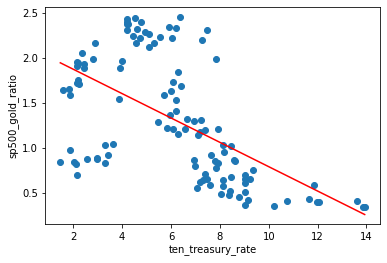

r² 0.33217749347870373


In [96]:
predict_sp500_gold_ratio = regression(filtered_data_for_gold_prediction.ten_treasury_rate, filtered_data_for_gold_prediction.sp500_gold_ratio,1,"ten_treasury_rate","sp500_gold_ratio", test = False)

is gold undervalued?

In [97]:
CURRENT_SP500_GOLD_RATIO = 2.34
fair_sp500_gold_ratio = predict_sp500_gold_ratio(CURRENT_TREASURY_RATE)
print(fair_sp500_gold_ratio)
gold_ratio_treasury_prediction =is_xyz_undervalued_or_overvalued(CURRENT_SP500_GOLD_RATIO, fair_sp500_gold_ratio, "sp500_gold_ratio")

1.4062707831957766
the sp500_gold_ratio is overvalued! It is 66.39754078388134 to high.


In [98]:
# dataframe to use
dataframe = data
# treasury
def add_fair_pe_on_treasury_rate(row):
    return predict(treasury_rate_slope, row["one_treasury_rate"], treasury_rate_intercept)

dataframe['fair_pe_treasury_rate'] = dataframe.apply(add_fair_pe_on_treasury_rate, axis=1)

def add_discount_or_premium_based_on_treasury_rate(row):
    fair_price_to_earnings_value = row['fair_pe_treasury_rate'] 
    current_pe_ratio = row['price_to_earnings']
    return (current_pe_ratio / fair_price_to_earnings_value - 1 ) * 100 

dataframe['discount_or_premium_treasury_rate'] = dataframe.apply(add_discount_or_premium_based_on_treasury_rate, axis=1)

# fed fund 
def add_fair_pe_on_fed_fund_rate(row):
    fair_treasury_rate_value = predict(fed_fund_slope,row['fed_fund_rate'],fed_fund_intercept)
    return predict(treasury_rate_slope, fair_treasury_rate_value, treasury_rate_intercept)

dataframe['fair_pe_fed_fund'] = dataframe.apply(add_fair_pe_on_fed_fund_rate, axis=1)

def add_discount_or_premium_based_on_fed_fund_rate(row):
    fair_treasury_rate_value = row['fair_pe_treasury_rate']
    fair_price_to_earnings_value = row['fair_pe_fed_fund']
    current_pe_ratio = row['price_to_earnings']
    return (current_pe_ratio / fair_price_to_earnings_value - 1) * 100

dataframe['discount_or_premium_fed_fund_rate'] = dataframe.apply(add_discount_or_premium_based_on_fed_fund_rate, axis=1)
    

# fed fund poly
def add_fair_pe_on_fed_fund_rate_poly(row):
    return predictPEbasedOnFedFundRate(row['fed_fund_rate'])

dataframe['fair_pe_fed_fund_poly'] = dataframe.apply(add_fair_pe_on_fed_fund_rate_poly, axis=1)

def add_discount_or_premium_based_on_fed_fund_rate_poly(row):
    fair_price_to_earnings_value = predictPEbasedOnFedFundRate(row['fed_fund_rate'])
    current_pe_ratio = row['price_to_earnings']
    return (current_pe_ratio / fair_price_to_earnings_value - 1) * 100

dataframe['discount_or_premium_fed_fund_rate_poly'] = dataframe.apply(add_discount_or_premium_based_on_fed_fund_rate_poly, axis=1)


# sp500 gold ratio
def add_fair_sp500_gold_ratio_on_ten_treasury_rate(row):
    return predict_sp500_gold_ratio(row["ten_treasury_rate"])

dataframe['fair_sp500_gold_ratio_on_ten_treasury_rate'] = dataframe.apply(add_fair_sp500_gold_ratio_on_ten_treasury_rate, axis=1)

def add_discount_or_premium_for_sp500_gold_ratio(row):
    fair_sp500_gold_ratio = row['fair_sp500_gold_ratio_on_ten_treasury_rate']
    sp500_gold_ratio = row['sp500_gold_ratio']
    return (sp500_gold_ratio / fair_sp500_gold_ratio - 1) * 100

dataframe['discount_or_premium_for_sp500_gold_ratio'] = dataframe.apply(add_discount_or_premium_for_sp500_gold_ratio, axis=1)


### plotting premium/discount columns against the p/e ratio and asset price for reference

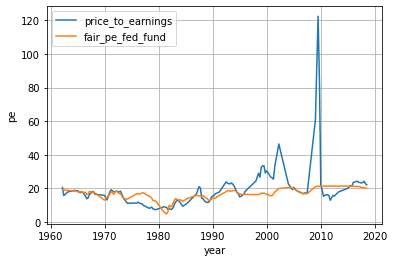

maximum discount -47.3706873892249


C:\Users\weiss\AppData\Local\Temp\ipykernel_35492\2522985374.py:16: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis='x', nbins=len(dataframe.index))


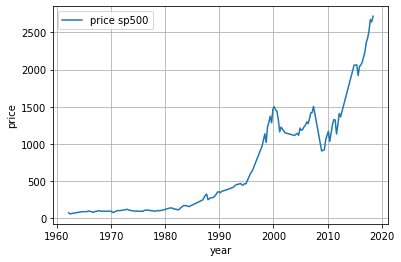

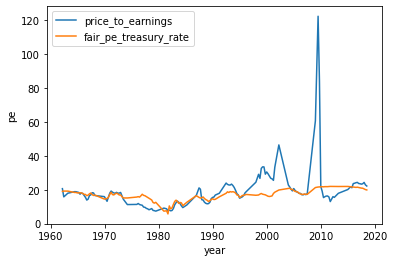

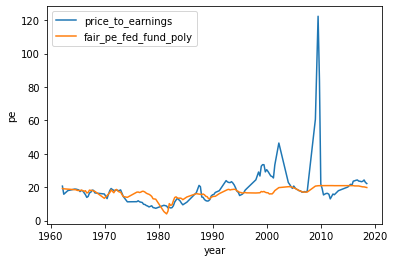

maximum discount fed fund poly -48.13187518332962


In [99]:

plt.xlabel("year")
#plt.plot(filtered_data.discount_or_premium_fed_fund_rate)
plt.plot(dataframe.price_to_earnings)
plt.plot(dataframe.fair_pe_fed_fund)
plt.grid()
plt.ylabel("pe")
plt.xlabel("year")
plt.legend(["price_to_earnings", "fair_pe_fed_fund"])
plt.show()
print("maximum discount",dataframe.discount_or_premium_fed_fund_rate.min())

plt.plot(dataframe.sp_500_nominal)
plt.ylabel("price")
plt.xlabel("year")
plt.legend(["price sp500"])
plt.locator_params(axis='x', nbins=len(dataframe.index))
plt.grid()
plt.show()

#plt.plot(filtered_data.discount_or_premium_treasury_rate)
plt.plot(dataframe.price_to_earnings)
plt.plot(dataframe.fair_pe_treasury_rate)
plt.ylabel("pe")
plt.xlabel("year")
plt.legend(["price_to_earnings", "fair_pe_treasury_rate"])
plt.show()

#plt.plot(filtered_data.discount_or_premium_fed_fund_rate_poly)
plt.plot(dataframe.price_to_earnings)
plt.plot(dataframe.fair_pe_fed_fund_poly)
plt.ylabel("pe")
plt.xlabel("year")
plt.legend(["price_to_earnings", "fair_pe_fed_fund_poly"])
plt.show()
print("maximum discount fed fund poly",dataframe.discount_or_premium_fed_fund_rate_poly.min())

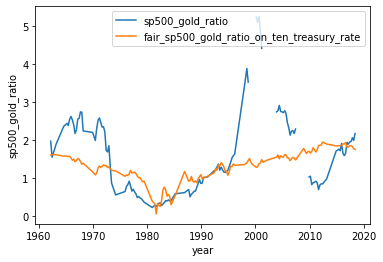

maximum discount gold price -62.299728523664065
maximum discount gold price 323.9310784059275


In [100]:
plt.plot(dataframe.sp500_gold_ratio)
plt.plot(dataframe.fair_sp500_gold_ratio_on_ten_treasury_rate)
plt.ylabel("sp500_gold_ratio")
plt.xlabel("year")
plt.legend(["sp500_gold_ratio", "fair_sp500_gold_ratio_on_ten_treasury_rate"])
plt.show()
print("maximum discount gold price",dataframe.discount_or_premium_for_sp500_gold_ratio.min())
print("maximum discount gold price",dataframe.discount_or_premium_for_sp500_gold_ratio.max())

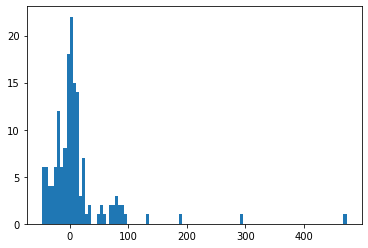

51 % discount
88.24 % likelyhood of getting that discount
1.3829760000000013 % to invest from gold
-51 % premium
0.0 % likelyhood of getting that discount
100.0 % to invest from gold
Based on fed fund


In [101]:
import math


def get_occurences_for_discount_value(discount, column):
    return len(column[(column <= int(discount)+1) & (column >= int(discount) -1) ])

def get_likelyhood_for_discount_value(discount,column):
    min = column.min().astype(int)
    max = column.max().astype(int)

    occurences = get_occurences_for_discount_value(discount, column)
    sum = 0
    max_occurence = 0
    percent_with_max_occurence = 0

    for percent in range(min,max+1,1):
        tmp_max_occurence =  get_occurences_for_discount_value(percent, column)
        if max_occurence == None or tmp_max_occurence > max_occurence:
            max_occurence = tmp_max_occurence
            percent_with_max_occurence = percent

        sum = sum + get_occurences_for_discount_value(percent, column)
     
    min = discount    
    sum_range_occurances = 0
    for percent in range(min,max):
         sum_range_occurances = sum_range_occurances + get_occurences_for_discount_value(percent, column)

    return 100 - sum_range_occurances/sum *100

def investment_strat(likelyhood):
    return (likelyhood-100) ** 2 / 10000


plt.hist(dataframe.discount_or_premium_fed_fund_rate,bins=100)
plt.show()

discount = int(fed_prediction )
likelyhood = round(get_likelyhood_for_discount_value(discount, dataframe.discount_or_premium_fed_fund_rate),2)
print(discount,"% discount")
print(likelyhood, "% likelyhood of getting that discount")
print(investment_strat(likelyhood) * 100, "% to invest from gold")

discount = int(fed_prediction *-1)
print(discount,"% premium")
likelyhood = round(get_likelyhood_for_discount_value(discount, dataframe.discount_or_premium_fed_fund_rate),2)
print(likelyhood, "% likelyhood of getting that discount")
print(investment_strat(likelyhood) *100, "% to invest from gold")


x = [i for i in range(-100,101,1)]
x2 = [get_likelyhood_for_discount_value(x, dataframe.discount_or_premium_fed_fund_rate) for x in x]
y = [investment_strat(x2) for x2 in x2]

print("Based on fed fund")

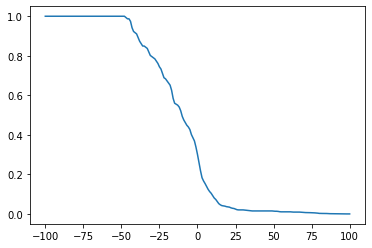

In [102]:
plt.plot(x,y)

### create empirical cdf, because it may create future bias,
 because i use the real chance of everything in the whole history of the dataset.

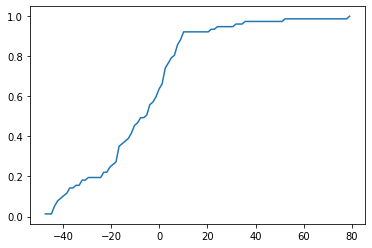

In [103]:
from statsmodels.distributions.empirical_distribution import ECDF

def create_ecdf_and_plot(data, test= True):

    ## using half of the data for training
    half_idx = len(data) // 2
    data = data[:half_idx]

    # Create an empirical distribution function
    ecdf = ECDF(data)

    # Evaluate the EDF at a set of values
    x = np.linspace(min(data), max(data), 100)
    y = ecdf(x)

    # Plot the EDF
    plt.plot(x, y)
    plt.show()

    return ecdf

ecdf_fed_fund_rate = create_ecdf_and_plot(dataframe.discount_or_premium_fed_fund_rate, test= False)

In [104]:
discount = fed_prediction
likelyhood = round(ecdf_fed_fund_rate(discount) *100, 2)
print(discount,"% discount")
print(likelyhood, "% likelyhood of getting that discount")
print(investment_strat(likelyhood)* 100, "% to invest from gold")

discount = fed_prediction * -1
print(discount,"% premium")
likelyhood = round(ecdf_fed_fund_rate(discount)* 100, 2)
print(likelyhood, "% likelyhood of getting that discount")
print(investment_strat(likelyhood) * 100, "% to invest from gold")



51.432075337403724 % discount
97.4 % likelyhood of getting that discount
0.0675999999999997 % to invest from gold
-51.432075337403724 % premium
0.0 % likelyhood of getting that discount
100.0 % to invest from gold


## ecdf for discount_treasury_rate

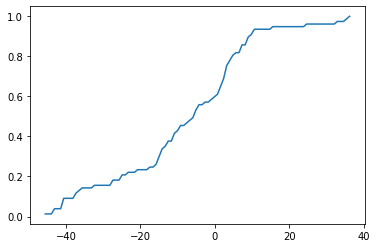

In [105]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf_one_treasury_rate = create_ecdf_and_plot(dataframe.discount_or_premium_treasury_rate, test= False)

In [106]:
discount = treasury_prediction
likelyhood = round(ecdf_one_treasury_rate(discount) *100,2)
print(discount,"% discount")
print(likelyhood, "% likelyhood of getting that discount")
print(investment_strat(likelyhood) *100, "% to invest from gold")

discount = treasury_prediction * -1
print(discount,"% premium")
likelyhood = round(ecdf_one_treasury_rate(discount)* 100,2)
print(likelyhood, "% likelyhood of getting that discount")
print(investment_strat(likelyhood) *100, "% to invest from gold")


50.526233515287046 % discount
100.0 % likelyhood of getting that discount
0.0 % to invest from gold
-50.526233515287046 % premium
0.0 % likelyhood of getting that discount
100.0 % to invest from gold


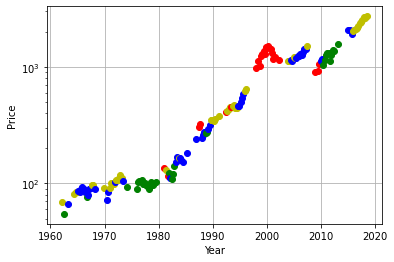

In [107]:
import matplotlib.pyplot as plt
import numpy as np



# Define thresholds for changing colors
threshold_1std = 0.68  # 68% for the first standard deviation
threshold_2std = 0.95  # 95% for the second standard deviation
threhol_1st_negativ = 0.32

# Plot the S&P 500 data and change colors based on chance values
for i, discount_or_premium_treasury_rate in zip(range(len(dataframe)), dataframe["discount_or_premium_treasury_rate"]):
 
    if ecdf_one_treasury_rate(discount_or_premium_treasury_rate) > threshold_2std:
        plt.plot(dataframe.index[i], dataframe['sp_500_nominal'].iloc[i],'ro')
    elif ecdf_one_treasury_rate(discount_or_premium_treasury_rate) > threshold_1std:
        plt.plot(dataframe.index[i], dataframe['sp_500_nominal'].iloc[i], 'yo')
    elif ecdf_one_treasury_rate(discount_or_premium_treasury_rate) < threhol_1st_negativ:
        plt.plot(dataframe.index[i], dataframe['sp_500_nominal'].iloc[i], 'go')
    else:
        plt.plot(dataframe.index[i], dataframe['sp_500_nominal'].iloc[i], 'bo')

# Set the y-axis to logarithmic scale
plt.yscale('log')

plt.ylabel("Price")
plt.xlabel("Year")
plt.grid()
plt.show()


In [108]:
# Load your existing data
data = pd.read_csv("data/historical-inflation-rate-by-year.csv")


# Set the 'date' column as the index
data.set_index('date', inplace=True)
# Convert the 'date' column to a datetime object
data.index = mdates.num2date(mdates.datestr2num(data.index))
# Resample the data to fill in missing months
data_resampled = data.resample('D').ffill()


data_resampled.rename(columns={' value': 'inflation'}, inplace=True) 
filtered_data = pd.merge(filtered_data, data_resampled , left_index=True, right_index=True)

filtered_data.head()

ten_treasury_rate  price_to_earnings  \
1962-03-01 00:00:00+00:00               3.98            20.6380   
1962-06-01 00:00:00+00:00               3.89            15.7781   
1963-03-01 00:00:00+00:00               3.93            17.9434   
1964-06-01 00:00:00+00:00               4.19            18.8661   
1964-09-01 00:00:00+00:00               4.21            18.8322   

                           one_treasury_rate  five_treasury_rate  \
1962-03-01 00:00:00+00:00               3.15                3.71   
1962-06-01 00:00:00+00:00               2.98                3.64   
1963-03-01 00:00:00+00:00               3.00                3.67   
1964-06-01 00:00:00+00:00               3.84                4.03   
1964-09-01 00:00:00+00:00               3.83                4.08   

                           fed_fund_rate  sp_500_real  sp_500_nominal  \
1962-03-01 00:00:00+00:00           2.50       675.40           69.55   
1962-06-01 00:00:00+00:00           2.75       529.93           54.75   
1963-03-01 00:00:00+00:00           3.00       637.94           66.57   
1964-06-01 00:00:00+00:00           3.50       770.26           81.69   
1964-09-01 00:00:00+00:00           3.50       791.21           84.18   

                           gold_real  gold_nominal       gdp  ...  \
1962-03-01 00:00:00+00:00     342.90         35.31  $594.01B  ...   
1962-06-01 00:00:00+00:00     341.77         35.31  $600.37B  ...   
1963-03-01 00:00:00+00:00     338.38         35.31  $621.67B  ...   
1964-06-01 00:00:00+00:00     332.94         35.31  $678.67B  ...   
1964-09-01 00:00:00+00:00     331.88         35.31  $692.03B  ...   

                          shifted_historical_inflation2  \
1962-03-01 00:00:00+00:00                           NaN   
1962-06-01 00:00:00+00:00                           NaN   
1963-03-01 00:00:00+00:00                          0.00   
1964-06-01 00:00:00+00:00                          0.00   
1964-09-01 00:00:00+00:00                          0.33   

                           shifted_one_treasury_rate2  \
1962-03-01 00:00:00+00:00                         NaN   
1962-06-01 00:00:00+00:00                         NaN   
1963-03-01 00:00:00+00:00                        3.15   
1964-06-01 00:00:00+00:00                        2.98   
1964-09-01 00:00:00+00:00                        3.00   

                           shifted_five_treasury_rate2  \
1962-03-01 00:00:00+00:00                          NaN   
1962-06-01 00:00:00+00:00                          NaN   
1963-03-01 00:00:00+00:00                         3.71   
1964-06-01 00:00:00+00:00                         3.64   
1964-09-01 00:00:00+00:00                         3.67   

                           shifted_ten_treasury_rate2  \
1962-03-01 00:00:00+00:00                         NaN   
1962-06-01 00:00:00+00:00                         NaN   
1963-03-01 00:00:00+00:00                        3.98   
1964-06-01 00:00:00+00:00                        3.89   
1964-09-01 00:00:00+00:00                        3.93   

                           shifted_historical_inflation3  \
1962-03-01 00:00:00+00:00                            NaN   
1962-06-01 00:00:00+00:00                            NaN   
1963-03-01 00:00:00+00:00                            NaN   
1964-06-01 00:00:00+00:00                            0.0   
1964-09-01 00:00:00+00:00                            0.0   

                           shifted_one_treasury_rate3  \
1962-03-01 00:00:00+00:00                         NaN   
1962-06-01 00:00:00+00:00                         NaN   
1963-03-01 00:00:00+00:00                         NaN   
1964-06-01 00:00:00+00:00                        3.15   
1964-09-01 00:00:00+00:00                        2.98   

                           shifted_five_treasury_rate3  \
1962-03-01 00:00:00+00:00                          NaN   
1962-06-01 00:00:00+00:00                          NaN   
1963-03-01 00:00:00+00:00                          NaN   
1964-06-01 00:00:00+00:00          

In [135]:
filtered_data["inflation_ttm"]  = filtered_data['historical_inflation'].rolling(window=12).mean()

filtered_data['rate_inflation_difference_ten'] = filtered_data['ten_treasury_rate'] - filtered_data['inflation']
filtered_data['rate_inflation_difference_one'] = filtered_data['one_treasury_rate'] - filtered_data['inflation']

filtered_data['rate_inflation_difference_ten'] = filtered_data['rate_inflation_difference_ten'].rolling(window=12).mean()
filtered_data['rate_inflation_difference_one'] = filtered_data['rate_inflation_difference_one'].rolling(window=12).mean()

filtered_data['sp_rolling_12_months_return'] = filtered_data['sp_500_nominal'].pct_change(periods=12)
filtered_data['gold_rolling_12_months_return'] = filtered_data['gold_nominal'].pct_change(periods=12)

filtered_data[["gold_rolling_12_months_return", "sp_rolling_12_months_return", "inflation_ttm", "one_treasury_rate", "ten_treasury_rate", "rate_inflation_difference_ten", "rate_inflation_difference_one", "gold_nominal", "sp_500_nominal", "price_to_earnings", "sp500_gold_ratio"]].corr()[["gold_rolling_12_months_return", "sp_rolling_12_months_return", "gold_nominal", "sp_500_nominal", "price_to_earnings", "sp500_gold_ratio"]]

gold_rolling_12_months_return  \
gold_rolling_12_months_return                       1.000000   
sp_rolling_12_months_return                        -0.486020   
inflation_ttm                                       0.503591   
one_treasury_rate                                   0.179559   
ten_treasury_rate                                   0.181292   
rate_inflation_difference_ten                      -0.403002   
rate_inflation_difference_one                      -0.324183   
gold_nominal                                        0.128672   
sp_500_nominal                                     -0.212651   
price_to_earnings                                  -0.551643   
sp500_gold_ratio                                   -0.467595   

                               sp_rolling_12_months_return  gold_nominal  \
gold_rolling_12_months_return                    -0.486020      0.128672   
sp_rolling_12_months_return                       1.000000     -0.016265   
inflation_ttm                                    -0.290072     -0.487218   
one_treasury_rate                                 0.004122     -0.525712   
ten_treasury_rate                                -0.009851     -0.473357   
rate_inflation_difference_ten                     0.485103     -0.386774   
rate_inflation_difference_one                     0.432290     -0.550095   
gold_nominal                                     -0.016265      1.000000   
sp_500_nominal                                    0.267784      0.789554   
price_to_earnings                                 0.588720      0.214240   
sp500_gold_ratio                                  0.472168     -0.179713   

                               sp_500_nominal  price_to_earnings  \
gold_rolling_12_months_return       -0.212651          -0.551643   
sp_rolling_12_months_return          0.267784           0.588720   
inflation_ttm                       -0.660043          -0.706950   
one_treasury_rate                   -0.620245          -0.628091   
ten_treasury_rate                   -0.645200          -0.639013   
rate_inflation_difference_ten       -0.400554          -0.017324   
rate_inflation_difference_one       -0.537192          -0.105047   
gold_nominal                         0.789554           0.214240   
sp_500_nominal                       1.000000           0.604059   
price_to_earnings                    0.604059           1.000000   
sp500_gold_ratio                     0.339339           0.744692   

                               sp500_gold_ratio  
gold_rolling_12_months_return         -0.467595  
sp_rolling_12_months_return            0.472168  
inflation_ttm                         -0.447148  
one_treasury_rate                     -0.349139  
ten_treasury_rate                     -0.470487  
rate_inflation_difference_ten         -0.065540  
rate_inflation_difference_one         -0.012137  
gold_nominal                          -0.179713  
sp_500_nominal                         0.339339  
price_to_earnings                      0.744692  
sp500_gold_ratio                       1.000000

C:\Users\weiss\AppData\Local\Temp\ipykernel_35492\3573908277.py:33: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  ax.locator_params(axis='x', nbins=len(filtered_data.index))


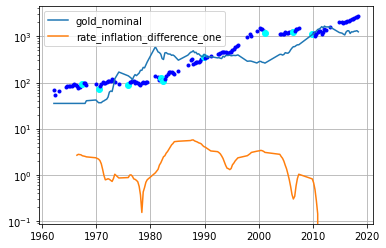

In [133]:
fig, ax = plt.subplots()
data_to_analyse = []
gather_data_count = 0
previously_inverted = False
# Plot the SP500 data in red if the ten treasury rate is above the one treasury rate, otherwise plot it in blue
for index, row in filtered_data.iterrows():
    if row['ten_treasury_rate'] < row['one_treasury_rate']:
        data_to_analyse.append(row[["one_treasury_rate", "ten_treasury_rate", "sp_500_nominal"]])
        ax.plot(index, row['sp_500_nominal'], 'b.')  # Red circle marker
        gather_data_count = 10
        previously_inverted = True
    else:
        if gather_data_count > 0:
            data_to_analyse.append(row[["ten_treasury_rate", "sp_500_nominal"]])
            gather_data_count = gather_data_count -1 
        if previously_inverted: 
            ax.plot(index, row['sp_500_nominal'], color="cyan", marker='o')  
            previously_inverted = False
        else:
            ax.plot(index, row['sp_500_nominal'], 'b.')  # Blue circle marker
        

# Plot the other lines
#ax.plot(filtered_data.index, filtered_data.ten_treasury_rate, label="ten_treasury_rate")
#ax.plot(filtered_data.index, filtered_data.one_treasury_rate, label="one_treasury_rate")
#ax.plot(filtered_data.index, filtered_data.inflation, label="inflation")
ax.plot(filtered_data.index, filtered_data.gold_nominal, label="gold_nominal")
ax.plot(filtered_data.index, filtered_data.rate_inflation_difference_one, label="rate_inflation_difference_one")



# Set the x-axis to show all data points
ax.locator_params(axis='x', nbins=len(filtered_data.index))

# Add a legend
ax.legend()

# Set y-axis to a logarithmic scale
ax.set_yscale("log")

# Add a grid
ax.grid()

# Show the plot
plt.show()

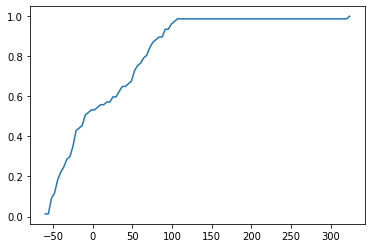

In [111]:
ecdf_sp500_gold_ratio_treasur = create_ecdf_and_plot(dataframe.discount_or_premium_for_sp500_gold_ratio, test= False)


In [112]:
discount = gold_ratio_treasury_prediction
likelyhood = round(ecdf_sp500_gold_ratio_treasur(discount) *100, 2)
print(discount,"% discount")
print(likelyhood, "% likelyhood of getting that discount")
print(investment_strat(likelyhood) *100, "% to invest from gold")

discount = gold_ratio_treasury_prediction * -1
print(discount,"% premium")
likelyhood = round(ecdf_sp500_gold_ratio_treasur(discount)* 100, 2)
print(likelyhood, "% likelyhood of getting that discount")
print(investment_strat(likelyhood) *100 , "% to invest from gold")

66.39754078388134 % discount
79.22 % likelyhood of getting that discount
4.318084000000001 % to invest from gold
-66.39754078388134 % premium
0.0 % likelyhood of getting that discount
100.0 % to invest from gold


## discount rate fed fund  fit normal function

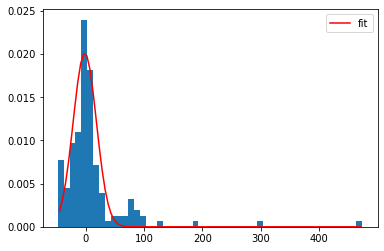

In [113]:
from scipy.stats import norm
from scipy.optimize import curve_fit


data = dataframe.discount_or_premium_fed_fund_rate
# Create a histogram of the data
hist, bin_edges = np.histogram(data, bins=100, density=True)


def fit_function(x, mean, std):
    return norm.pdf(x, loc=mean, scale=std)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
popt, pcov = curve_fit(fit_function, bin_centers, hist)

plt.hist(data, bins='auto', density=True)
plt.plot(bin_centers, fit_function(bin_centers, *popt), 'r-', label='fit')
plt.legend()
plt.show()


Text(0, 0.5, 'invest % from reserves')

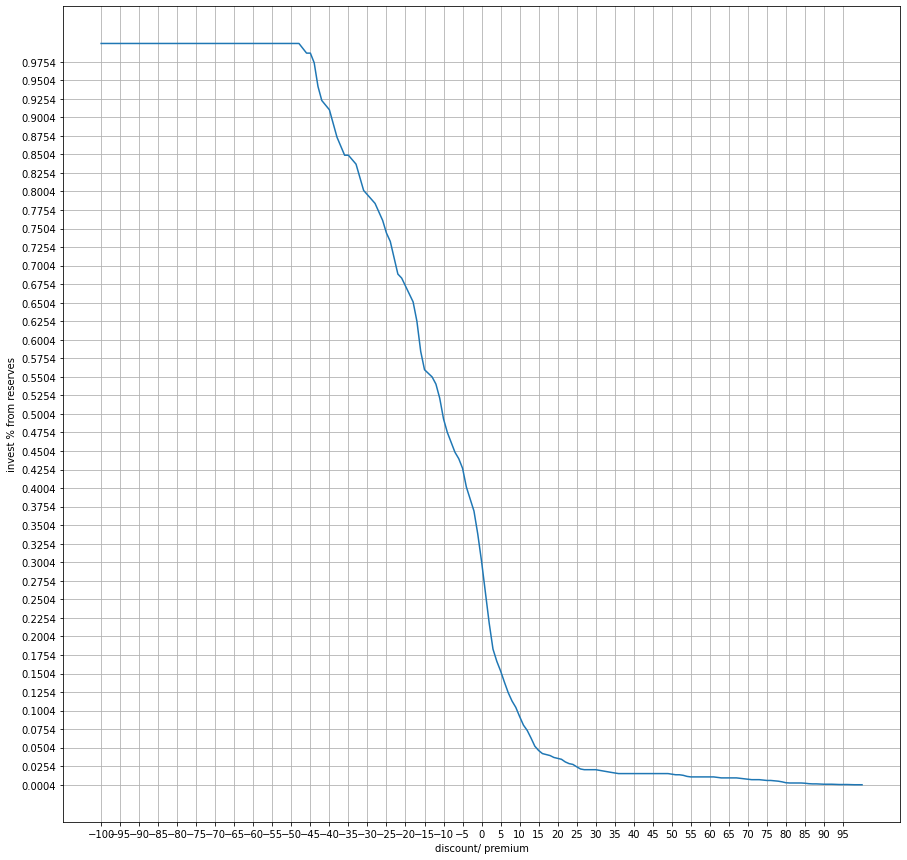

In [114]:
x = np.array(x)
y = np.array(y)
plt.figure(figsize=[15,15])
plt.xticks(np.arange(float(x.min()),float(x.max()), step=5))
plt.yticks(np.arange(float(y.min()),float(y.max()), step=0.025))
plt.grid()
plt.plot(x, y)
plt.xlabel("discount/ premium")
plt.ylabel("invest % from reserves")

Testing 

In [115]:

def calc_percent_gain_loss(previous_price, price, invested):
    return invested * (price / previous_price)

def calc_investment_percent_my_ecdf(investment_strat, discount, data):
    half_idx = len(data) // 2
    first_half = data[:half_idx]
    return round(investment_strat(get_likelyhood_for_discount_value(int(discount*100), first_half)),2)

def calc_investment_percent_std_ecdf(investment_strat, discount, data):
    return round(investment_strat(ecdf(discount)*100),2)

def backtest(cash, investment_strat, discount_or_premium_based_on, calc_investment_percent_with_pf= calc_investment_percent_my_ecdf, save_asset = filtered_data.gold_nominal, test= False):
    
    capital_over_time = []
    investment_percent_over_time = []
    previous_stock_price = None
    previous_gold_price = None
    invested = None
    sp_500_nom = filtered_data.sp_500_nominal

    if test:
        half_idx = len(discount_or_premium_based_on) // 2
        #discount_or_premium_based_on = discount_or_premium_based_on[half_idx:]
        sp_500_nom = sp_500_nom[half_idx:]
        save_asset = save_asset[half_idx:]

    for stock_price, gold_price, discount_stocks in zip(sp_500_nom, save_asset, discount_or_premium_based_on):

        investment_percent = calc_investment_percent_with_pf(investment_strat, discount_stocks, discount_or_premium_based_on)

        if not previous_stock_price and not invested:
            previous_stock_price = stock_price
            previous_gold_price = gold_price
            invested = cash * investment_percent
            reserve = cash - invested
            cash = 0
            capital_over_time.append(invested + reserve)
            investment_percent_over_time.append(investment_percent)
            continue
        
        invested = calc_percent_gain_loss(previous_stock_price, stock_price, invested)
        reserve = calc_percent_gain_loss(previous_gold_price, gold_price, reserve)

        new_invested = (invested + reserve) * investment_percent
        reserve = invested + reserve - new_invested
        invested = new_invested
        capital_over_time.append(invested + reserve)
        investment_percent_over_time.append(investment_percent)
        
        previous_stock_price = stock_price
        previous_gold_price = gold_price

    return invested + reserve , capital_over_time, investment_percent_over_time


capital, capital_over_time_treasury_rate_my_ecdf_full_data, investment_percent_over_time = backtest(1000, investment_strat, dataframe.discount_or_premium_treasury_rate)
apital, capital_over_time_fed_fund_rate_my_ecdf_full_data, investment_percent_over_time_fed_fund_rate = backtest(1000, investment_strat, dataframe.discount_or_premium_fed_fund_rate)
capital_no_strat, capital_over_time_no_strat, investment_percent_over_time = backtest(1000, lambda x : 1, dataframe.discount_or_premium_treasury_rate) 
capital, capital_over_time_fed_fund_rate_with_std_ecdf, investment_percent_over_time_fed_fund_rate = backtest(1000, investment_strat, dataframe.discount_or_premium_fed_fund_rate)
capital, capital_over_time_calc_investment_percent_my_ecdf_use_half_the_data, investment_percent_over_time_fed_fund_rate = backtest(1000, investment_strat, dataframe.discount_or_premium_fed_fund_rate)
#capital, capital_over_time_calc_investment_percent_my_ecdf_use_half_the_data_bonds, investment_percent_over_time_fed_fund_rate_bonds = backtest(1000, investment_strat, filtered_data.discount_or_premium_fed_fund_rate, calc_investment_percent_with_pf=calc_investment_percent_my_ecdf_use_half_the_data, save_asset= dataframe.ten_year_treasury_prices)



KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (154,) and (145,)

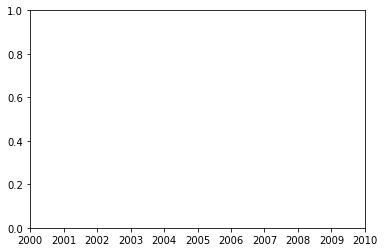

In [ ]:
half_idx = len(dataframe.index) // 2
second_half_of_index = dataframe.index[half_idx:]

index = dataframe.index
plt.plot(index, capital_over_time_treasury_rate_my_ecdf_full_data)
plt.plot(index, capital_over_time_fed_fund_rate_my_ecdf_full_data)
plt.plot(index, capital_over_time_no_strat)
plt.plot(index, capital_over_time_fed_fund_rate_with_std_ecdf) 
plt.plot(index, capital_over_time_calc_investment_percent_my_ecdf_use_half_the_data) 
#plt.plot(index, capital_over_time_calc_investment_percent_my_ecdf_use_half_the_data_bonds) 
plt.ylabel("capital_over_time")
plt.xlabel("year")
plt.grid()
plt.title("1000$ invested in the s&p 500, with and without investment strategy")
plt.legend(["capital_over_time_treasury_rate_my_ecdf_full_data","capital_over_time_fed_fund_rate_my_ecdf_full_data", "capital_without_strategy","fed_fund_rate_with_std_ecdf","my_ecdf_use_half_the_data"])
plt.show()

plt.title("discount_or_premium_treasury_rate")
plt.plot(dataframe.index, dataframe.discount_or_premium_treasury_rate)
plt.axhline(y=0, color ="r")
plt.show()

plt.plot(dataframe.index, dataframe.gold_nominal)
plt.plot(dataframe.index, dataframe.sp_500_nominal)
#plt.plot(filtered_data.index, filtered_data.bond)
plt.legend(["gold_nominal" , "sp500"])
plt.show()

plt.title("discount_or_premium_gold")
plt.plot(dataframe.index, dataframe.discount_or_premium_for_sp500_gold_ratio)
plt.axhline(y=0, color ="r")
plt.show()

Testing trading strat where stock percentage is higher.

In [ ]:
def backtest_with_reserve_focus(cash, investment_strat):
    
    capital_over_time = []
    previous_stock_price = None
    previous_gold_price = None
    invested = None
    for stock_price, gold_price, discount in zip(dataframe.sp_500_nominal, dataframe.gold_nominal, dataframe.discount_or_premium_fed_fund_rate_poly):

        investment_percent = round(investment_strat(get_likelyhood_for_discount_value(int(discount*100), dataframe.discount_or_premium_fed_fund_rate_poly)),2)

        if not previous_stock_price and not invested:
            previous_stock_price = stock_price
            previous_gold_price = gold_price
            reserve = cash * investment_percent
            invested = cash - reserve
            cash = 0
            capital_over_time.append(invested + reserve)
            continue
        
        invested = calc_percent_gain_loss(previous_stock_price, stock_price, invested)
        reserve = calc_percent_gain_loss(previous_gold_price, gold_price, reserve)

        new_reserve = (invested + reserve) * investment_percent
        invested = invested + reserve - new_reserve
        reserve = new_reserve
        capital_over_time.append(invested + reserve)
        
        previous_stock_price = stock_price
        previous_gold_price = gold_price

    return invested + reserve , capital_over_time

capital_reserve_focus, capital_over_time_reserve_focus = backtest_with_reserve_focus(1000, investment_strat)

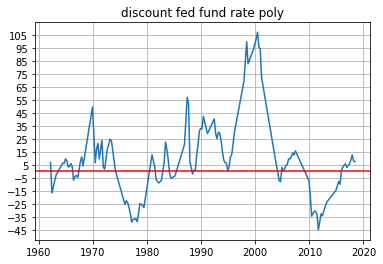

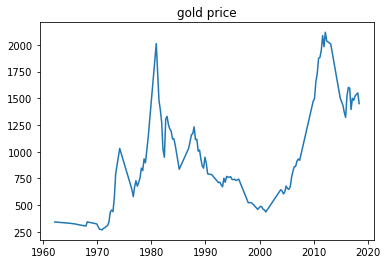

NameError: name 'capital_over_time' is not defined

In [ ]:

plt.title("discount fed fund rate poly")
plt.plot(dataframe.index, dataframe.discount_or_premium_fed_fund_rate_poly)
plt.axhline(y=0, color ="r")
plt.grid()
plt.yticks(np.arange(dataframe.discount_or_premium_fed_fund_rate_poly.min(),dataframe.discount_or_premium_fed_fund_rate_poly.max(),step=10))
plt.show()

plt.title("gold price")
plt.plot(dataframe.index, dataframe.gold_real)
plt.show()

plt.plot(dataframe.index, capital_over_time)
plt.plot(dataframe.index, capital_over_time_reserve_focus)
plt.plot(dataframe.index, capital_over_time_no_strat)
plt.ylabel("capital_over_time")
plt.xlabel("year")
plt.title("1000$ invested in the s&p 500, with different investment strategies")
plt.legend(["capital_with_strategy","capital_with_strategy_reserve_focus","capital_without_strategy"])
plt.show()

plt.plot(dataframe.fed_fund_rate)
plt.show()

plt.plot(dataframe.price_to_earnings)
plt.plot(dataframe.fair_pe_fed_fund_poly)
plt.xlabel("year")
plt.legend(["price_to_earnings", "fair_pe_fed_fund_poly"])
plt.show()

- pe / bond rates  stocks over or undervalued compared to bonds   stocks are overvalued to bond x %
- sp500 / goldprice  gold over or undervalued compared to stocks  stocks are overvalued to gold y %  
- y + x / x invest in bonds and rest in gold

### Use model
    

In [ ]:
# https://www.cnbc.com/quotes/US10Y
CURRENT_TREASURY_RATE = 5.358
# https://www.multpl.com/s-p-500-pe-ratio
CURRENT_PE_RATIO_SP = 24.95

fair_price_to_earnings_value = predict(treasury_rate_slope,CURRENT_TREASURY_RATE,treasury_rate_intercept)
print("fair p/e value for the current treasury rate yield,",CURRENT_TREASURY_RATE,",is",fair_price_to_earnings_value)
print("p/e of the s&p 500,", CURRENT_PE_RATIO_SP)

prediction = None
def is_xyz_undervalued_or_overvalued(current, fair, topic):

    if current < fair:
        prediction =  1- current / fair
        print("the "+topic+" is undervalued! Should be", prediction,"higher.")
    else:
        prediction = fair / current - 1
        print("the "+topic+" is overvalued! Should be", prediction ,"lower.")
    
    return prediction

sp_prediction = is_xyz_undervalued_or_overvalued(CURRENT_PE_RATIO_SP, fair_price_to_earnings_value, "s&p")


fair p/e value for the current treasury rate yield, 5.358 ,is 15.598425238830732
p/e of the s&p 500, 24.95
the s&p is overvalued! Should be -0.37481261567812696 lower.
